# HW 11 - Assignment 1
#### Author: Daniel Fay
-----------
#### Tasks:

1) Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file  

2) Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

3) Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

4) Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

5) Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the location of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

### Import Libraries
--------------

In [176]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import shapely
import seaborn
import os
%matplotlib inline

print (os.getenv("PUIDATA"))

/Users/Danny1/PUIDATA


### Task 1
--------------
* Download census tract shapefile for NYC
* Load into geopandas dataframe

In [183]:
# Download NYC census tract shapefile from nyc.gov into PUIDATA and unzip
os.system('curl -o ' + os.getenv('PUIDATA') + '/nycb2010_16d.zip' +
          ' http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip')
os.system("unzip " + os.getenv("PUIDATA") + "/nycb2010_16d.zip -d " + os.getenv("PUIDATA"))

0

In [185]:
# Load census tract data into geopandas dataframe
ct_nyc = gpd.read_file(os.getenv('PUIDATA') + '/nycb2010_16d/nycb2010.shp')
ct_nyc.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


### Task 2
--------------
* Download NYC borough shapefile
* Load NYC borough shapefile into geopandas dataframe
* Extract only brooklyn borough
* Find census tracts within brooklyn borough
* Convert geometry to latitude and longitude

In [186]:
# Download NYC borough shapefile from nyc.gov into PUIDATA and unzip
os.system('curl -o ' + os.getenv('PUIDATA') + '/nybb_16d.zip' +
          ' http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nybb_16d.zip')
os.system("unzip " + os.getenv("PUIDATA") + "/nybb_16d.zip -d " + os.getenv("PUIDATA"))

0

In [187]:
# Load NYC borough data into geopandas dataframe
bb_nyc = gpd.read_file(os.getenv('PUIDATA') + '/nybb_16d/nybb.shp')
bb_nyc

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry
0,5,Staten Island,1.623819e+09,330476.026530,(POLYGON ((970217.0223999023 145643.3322143555...
1,2,Bronx,1.186816e+09,464081.177750,(POLYGON ((1012821.805786133 229228.2645874023...
2,1,Manhattan,6.364540e+08,358410.655945,(POLYGON ((981219.0557861328 188655.3157958984...
3,3,Brooklyn,1.937484e+09,741039.196851,(POLYGON ((1021176.479003906 151374.7969970703...
4,4,Queens,3.044830e+09,895715.765066,(POLYGON ((1029606.076599121 156073.8142089844...


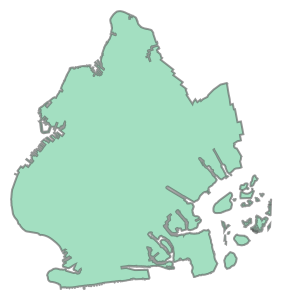

In [188]:
# Extract brooklyn borough boundary
bb_bkn = bb_nyc.ix[3].geometry
bb_bkn

#### Figure 1:  
Thea above figure shows the boundary for brooklyn

In [189]:
# Extract only brooklyn census tracts
ct_bkn = ct_nyc[ct_nyc.geometry.within(bb_bkn)]
ct_bkn.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((982421.0634155273 178133.8510131836,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((985596.1882324219 193858.6517944336,..."
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((986271.9053955078 193612.9270019531,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((988369.8604125977 192442.1943969727,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,"POLYGON ((988949.616394043 193714.8265991211, ..."


In [190]:
# Convert geometry to latitude and longitude
ct_bkn = ct_bkn.to_crs({'init': 'epsg:4326'})
ct_bkn.reset_index(inplace=True)
ct_bkn.drop('index', axis=1, inplace=True)
ct_bkn.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365179...
1,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
2,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981347...
3,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.6948851429698, ..."
4,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354039...


### Task 3
--------------
* Load CUSP coordinates from csv into pandas dataframe
* Convert to geopandas dataframe with point geometry

In [191]:
# Load CUSP coordinates into pandas dataframe
cusp_loc = pd.read_csv(os.getenv('PUIDATA') + '/CUSP_location.csv')
cusp_loc.head()

,Location,Lat,Lon
0,CUSP,40.6934,-73.9871


In [192]:
# Convert to shapely geometry point and load into geopandas dataframe
cusp_geometry = gpd.GeoSeries(shapely.geometry.Point(cusp_loc.Lon, cusp_loc.Lat))
cusp_geoloc = gpd.GeoDataFrame(cusp_loc, geometry=cusp_geometry)
cusp_geoloc.crs = {'init' :'epsg:4326'}
cusp_geoloc.drop(['Lat', 'Lon'], axis=1, inplace=True)
cusp_geoloc.head()

,Location,geometry
0,CUSP,POINT (-73.9871 40.6934)


### Task 4
--------------
* Extract census tract that contains CUSP location

In [193]:
# Extract census tract which contains CUSP geometry point
ct_cusp = gpd.sjoin(ct_bkn, cusp_geoloc, how="inner", op='contains')
ct_cusp.drop('index_right', axis=1, inplace=True)
ct_cusp.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry,Location
8854,30011001009,3,Brooklyn,1009,001100,69934.269433,1061.280668,POLYGON ((-73.98619262163143 40.69375351893803...,CUSP


### Task 5
--------------
* Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
* Overplot the location of cusp as a point (using pylab.scatter)
* Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

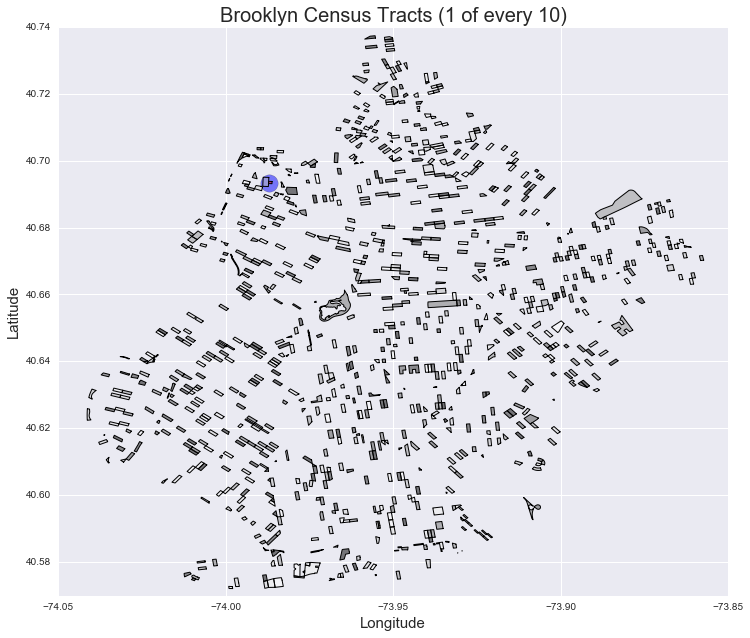

In [196]:
# Visualize census tracts and cusp location
fig, ax = plt.subplots(figsize=(12,15))
ax.set_aspect('equal')
ax.set_xlim(-74.05, -73.85)
ax.set_ylim(40.57, 40.74)
ax.set_title('Brooklyn Census Tracts (1 of every 10)', fontdict={'fontsize':20})
ax.set_xlabel('Longitude', fontdict={'fontsize':15})
ax.set_ylabel('Latitude', fontdict={'fontsize':15})

temp=[]
index_every10 = np.arange(1, len(ct_bkn), 10)

for i in index_every10:
    temp.append(ct_bkn.ix[i])
    
every10_ct_bkn = gpd.GeoDataFrame(temp)

plt.scatter(cusp_loc.Lon, cusp_loc.Lat, s=300, c='blue', alpha=.5)
ct_cusp.plot(ax=ax, color='red')
every10_ct_bkn.plot(ax=ax)

#### Figure 2:
Figure 2 illustrates 1 of every 10 census tracts located in Brooklyn as well as highlighting the census tract which contains CUSP (1 metrotech) in red and the actual location of CUSP in blue.